# Sequence-to-Sequence Tasks with Transformers using Python, PyTorch, and Huggingface

## 1. Introduction to Sequence-to-Sequence Tasks

### What is Sequence-to-Sequence?

Sequence-to-sequence (seq2seq) is a concept in machine learning where both the input and the output are sequences. The core idea is to use a neural network model to map an input sequence to an output sequence. These models are particularly useful for tasks where the length of the input sequence can differ from the length of the output sequence.

#### Applications of Seq2Seq:
- **Machine Translation**: Translating a sentence from one language to another.
- **Text Summarization**: Condensing a long article into a short summary.
- **Speech Recognition**: Converting spoken language into written text.
- **Image Captioning**: Describing the content of an image using a sentence.

### How does Seq2Seq work?

A typical seq2seq model consists of two main components:
1. **Encoder**: This part of the network compresses the input into a "context" or "memory" which the decoder then uses to produce the output.
2. **Decoder**: This part of the network unfolds the "context" to produce the output sequence.

The encoder processes the input sequence and compresses this information into a context vector, which is a fixed-size vector. The decoder then uses this context vector to produce the output sequence. The entire model is trained end-to-end.

---

## 2. Understanding the Transformer Architecture

The Transformer architecture, introduced in the paper ["Attention Is All You Need"](https://arxiv.org/abs/1706.03762), revolutionized the field of deep learning. It uses self-attention mechanisms to weigh input tokens differently, allowing for more flexible and context-aware representations.

![Transformer Architecture](https://miro.medium.com/max/2824/1*1cHMDM5GSfZ8z9dZREKwIQ.png)

---

## 3. Setting Up the Environment

First, let's set up our environment in Google Colab:


In [1]:
!pip install -q torch torchvision
!pip install -q transformers
!pip install -q sentencepiece

- Package Versions
To ensure reproducibility, it's essential to know the versions of the packages used in this tutorial. Here's how you can check the versions of the key packages:

In [9]:
import torch
import transformers

print(f"PyTorch Version: {torch.__version__}")
print(f"Transformers Version: {transformers.__version__}")

PyTorch Version: 2.0.1+cu118
Transformers Version: 4.33.2


## 4. Implementing a Seq2Seq Task with Transformers

For this tutorial, we'll focus on machine translation as our seq2seq task. We'll translate English sentences to French.

### 4.1. Loading the Model and Tokenizer

We'll use the `t5-small` model from Huggingface's model hub. T5 (Text-to-Text Transfer Transformer) is designed for various seq2seq tasks.


In [2]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_name = "t5-small"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


### 4.2. Translation Function

Let's define a function to handle the translation:

In [3]:
def translate(text, model, tokenizer):
    input_ids = tokenizer.encode("translate English to French: " + text, return_tensors="pt")
    # Using the generate method, which handles the encoder-decoder process internally
    outputs = model.generate(input_ids)
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translated_text

### 4.3. Testing the Translation

In [4]:
text = "Hello, how are you?"
translated_text = translate(text, model, tokenizer)
print(f"Translated Text: {translated_text}")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Translated Text: Bonjour, comment êtes-vous?


## 5. Visualizing the Results

Visualizing attention weights can provide insights into what the model "focuses" on when translating.


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


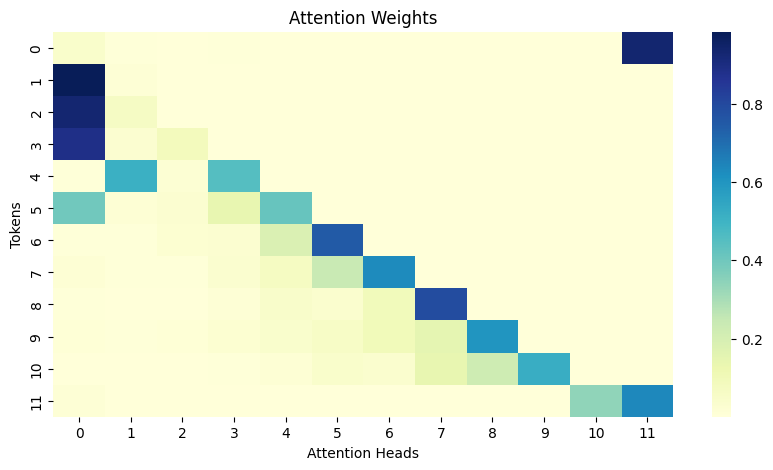

In [7]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_attention(text, model, tokenizer):
    # Encode the text with the prefix
    input_ids = tokenizer.encode("translate English to French: " + text, return_tensors="pt")

    # Generate the translation to get the decoder_input_ids
    with torch.no_grad():
        decoder_input_ids = model.generate(input_ids)

    # Get the model's outputs with attentions
    outputs = model(input_ids=input_ids, decoder_input_ids=decoder_input_ids, output_attentions=True)

    # Extract the attention weights from the outputs
    attentions = outputs[-1]  # attentions are the last item in the outputs tuple

    # Visualize the first layer's attention weights for the first head
    attention = attentions[0][0][0].squeeze().detach().numpy()

    plt.figure(figsize=(10, 5))
    sns.heatmap(attention, cmap="YlGnBu")
    plt.xlabel("Attention Heads")
    plt.ylabel("Tokens")
    plt.title("Attention Weights")
    plt.show()

visualize_attention(text, model, tokenizer)



## 6. Conclusion

Transformers have revolutionized the way we handle seq2seq tasks. With the power of Huggingface's Transformers library and PyTorch, implementing such tasks has become more accessible than ever. The visualization of attention weights offers a glimpse into the inner workings of these models, helping us understand their decision-making process.

> **Note**: This tutorial is a concise introduction to seq2seq tasks with Transformers. In practice, you might want to fine-tune models on specific datasets, handle longer sequences with more advanced techniques, and explore other architectures and models available in the Huggingface model hub.
